In [ ]:
!pip install geopandas
!pip install geopy
!pip install pygeos

In [ ]:
!pip install pygeos

In [ ]:
!pip install contextily

In [3]:
import geopy
geopy.geocoders.SERVICE_TO_GEOCODER

{'algolia': geopy.geocoders.algolia.AlgoliaPlaces,
 'arcgis': geopy.geocoders.arcgis.ArcGIS,
 'azure': geopy.geocoders.azure.AzureMaps,
 'baidu': geopy.geocoders.baidu.Baidu,
 'baiduv3': geopy.geocoders.baidu.BaiduV3,
 'banfrance': geopy.geocoders.banfrance.BANFrance,
 'bing': geopy.geocoders.bing.Bing,
 'databc': geopy.geocoders.databc.DataBC,
 'geocodeearth': geopy.geocoders.geocodeearth.GeocodeEarth,
 'geocodefarm': geopy.geocoders.geocodefarm.GeocodeFarm,
 'geonames': geopy.geocoders.geonames.GeoNames,
 'google': geopy.geocoders.googlev3.GoogleV3,
 'googlev3': geopy.geocoders.googlev3.GoogleV3,
 'geolake': geopy.geocoders.geolake.Geolake,
 'here': geopy.geocoders.here.Here,
 'ignfrance': geopy.geocoders.ignfrance.IGNFrance,
 'mapbox': geopy.geocoders.mapbox.MapBox,
 'mapquest': geopy.geocoders.mapquest.MapQuest,
 'maptiler': geopy.geocoders.maptiler.MapTiler,
 'nominatim': geopy.geocoders.nominatim.Nominatim,
 'opencage': geopy.geocoders.opencage.OpenCage,
 'openmapquest': geopy.ge

In [4]:
!ls entities/1915

1915.zip		 illustrierte_kronen_zeitung.json  new_york_herald.json
abo_underrattelser.json  innsbrucker_nachrichten.json	   uusi_aura.json
arbeiter_zeitung.json	 le_matin.json			   uusi_suometar.json
helsingin_sanomat.json	 l_oeuvre.json			   vastra_finland.json
hufvudstadsbladet.json	 neue_freie_presse.json


In [9]:
import pandas as pd
from geopandas import GeoDataFrame

gdf = GeoDataFrame(pd.read_json('entities/1915/l_oeuvre.json'))

gdf

,id,link,type,mention,start_idx,end_idx,stance,date
0,entity_mention_l_oeuvre_12148-bpt6k46161637_0,https://www.wikidata.org/wiki/Q64436,LOC,Arc de Triomphe,16,31,0,1915-09-10
1,entity_mention_l_oeuvre_12148-bpt6k46161637_3,https://www.wikidata.org/wiki/Q90,LOC,Paris,33,38,0,1915-09-10
2,entity_mention_l_oeuvre_12148-bpt6k46161637_5,https://www.wikidata.org/wiki/Q90,LOC,Paris,15,20,0,1915-09-10
3,entity_mention_l_oeuvre_12148-bpt6k46161637_8,None,LOC,la dtrection de Montyon denl,387,415,0,1915-09-10
4,entity_mention_l_oeuvre_12148-bpt6k46161637_10,https://www.wikidata.org/wiki/Q90,LOC,Paris,4,9,0,1915-09-10
...,...,...,...,...,...,...,...,...
18895,entity_mention_l_oeuvre_12148-bpt6k4616263k_305,https://www.wikidata.org/wiki/Q194662,LOC,Nouveau - Cirque,193,207,0,1915-12-31
18896,entity_mention_l_oeuvre_12148-bpt6k4616263k_307,None,LOC,Quat z - Arts,305,316,0,1915-12-31
18897,entity_mention_l_oeuvre_12148-bpt6k4616263k_308,None,LOC,"18 , rue Notre - Dame - des - Victoires , Paris",40,79,0,1915-12-31
18898,entity_mention_l_oeuvre_12148-bpt6k4616263k_317,https://www.wikidata.org/wiki/Q186652,LOC,rue Lafayette,124,137,0,1915-12-31


In [27]:
gdf.mention.unique().shape

(3578,)

In [59]:
unique_locs

,place
0,Arc de Triomphe
1,Paris
2,la dtrection de Montyon denl
3,France
4,"DE CHEVALLIER , LEVÉE FAR ORORE"
...,...
3573,Trianon - Lyri que
3574,Son Filleul ;
3575,Ba - raclan
3576,Caité - Rochechoiant


In [11]:
import geopandas as gpd

geometry = gpd.GeoDataFrame(columns=['mention', 'geometry', 'address'])

In [ ]:
from geopandas.tools import geocode

unique_locs = gpd.GeoDataFrame(gdf.mention.unique(), columns=['place'])

def process_loc(ent):
    global geometry
    print(ent)
    if ent not in geometry.mention.tolist():
        out = geocode(ent, provider='nominatim', user_agent='autogis_xx', timeout=4)
        out['mention'] = ent
        
        geometry = geometry.append(out)

unique_locs.place.apply(lambda x: process_loc(x))

In [17]:
geometry

,mention,geometry,address
0,Arc de Triomphe,POINT (2.29504 48.87378),"Arc de Triomphe, Charles de Gaulle - Étoile, Q..."
0,Paris,POINT (2.35146 48.85670),"Paris, Île-de-France, France métropolitaine, F..."
0,la dtrection de Montyon denl,GEOMETRYCOLLECTION EMPTY,None
0,France,POINT (1.88833 46.60335),France
0,"DE CHEVALLIER , LEVÉE FAR ORORE",GEOMETRYCOLLECTION EMPTY,None
...,...,...,...
0,sur,POINT (-76.40302 3.48454),"Sur, Valle del Cauca, Pacífica, Colombia"
0,Suippe,POINT (4.29627 49.30419),"La Suippe, Hauts-de-France, France métropolita..."
0,gare des Sablons,POINT (2.79931 48.37835),"Moret-sur-Loing - Veneux-les-Sablons, Avenue d..."
0,quai d ' Orsay,POINT (2.18746 48.69918),"Orsay, Palaiseau, Essonne, Île-de-France, Fran..."


In [36]:
pd.DataFrame(unique_locs).to_json('l_oeuvre_1915.json')

In [ ]:
from geopandas.tools import geocode

# gdf[['geometry', 'address']] = geocode(gdf.mention, provider='nominatim', user_agent='autogis_xx', timeout=4)
# gdf

for mention in gdf.mentions:
    gdf[['geometry', 'address']] = geocode(mention, provider='nominatim', user_agent='autogis_xx', timeout=4)

In [14]:
gdf

,id,link,type,mention,start_idx,end_idx,stance,date
0,entity_mention_l_oeuvre_12148-bpt6k46161637_0,https://www.wikidata.org/wiki/Q64436,LOC,Arc de Triomphe,16,31,0,1915-09-10
1,entity_mention_l_oeuvre_12148-bpt6k46161637_3,https://www.wikidata.org/wiki/Q90,LOC,Paris,33,38,0,1915-09-10
2,entity_mention_l_oeuvre_12148-bpt6k46161637_5,https://www.wikidata.org/wiki/Q90,LOC,Paris,15,20,0,1915-09-10
3,entity_mention_l_oeuvre_12148-bpt6k46161637_8,None,LOC,la dtrection de Montyon denl,387,415,0,1915-09-10
4,entity_mention_l_oeuvre_12148-bpt6k46161637_10,https://www.wikidata.org/wiki/Q90,LOC,Paris,4,9,0,1915-09-10
...,...,...,...,...,...,...,...,...
18895,entity_mention_l_oeuvre_12148-bpt6k4616263k_305,https://www.wikidata.org/wiki/Q194662,LOC,Nouveau - Cirque,193,207,0,1915-12-31
18896,entity_mention_l_oeuvre_12148-bpt6k4616263k_307,None,LOC,Quat z - Arts,305,316,0,1915-12-31
18897,entity_mention_l_oeuvre_12148-bpt6k4616263k_308,None,LOC,"18 , rue Notre - Dame - des - Victoires , Paris",40,79,0,1915-12-31
18898,entity_mention_l_oeuvre_12148-bpt6k4616263k_317,https://www.wikidata.org/wiki/Q186652,LOC,rue Lafayette,124,137,0,1915-12-31


In [20]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [147]:
gpd.options.use_pygeos = False

shape_1914 = gpd.read_file('shapefiles/cntry1914.shp')

<AxesSubplot:>

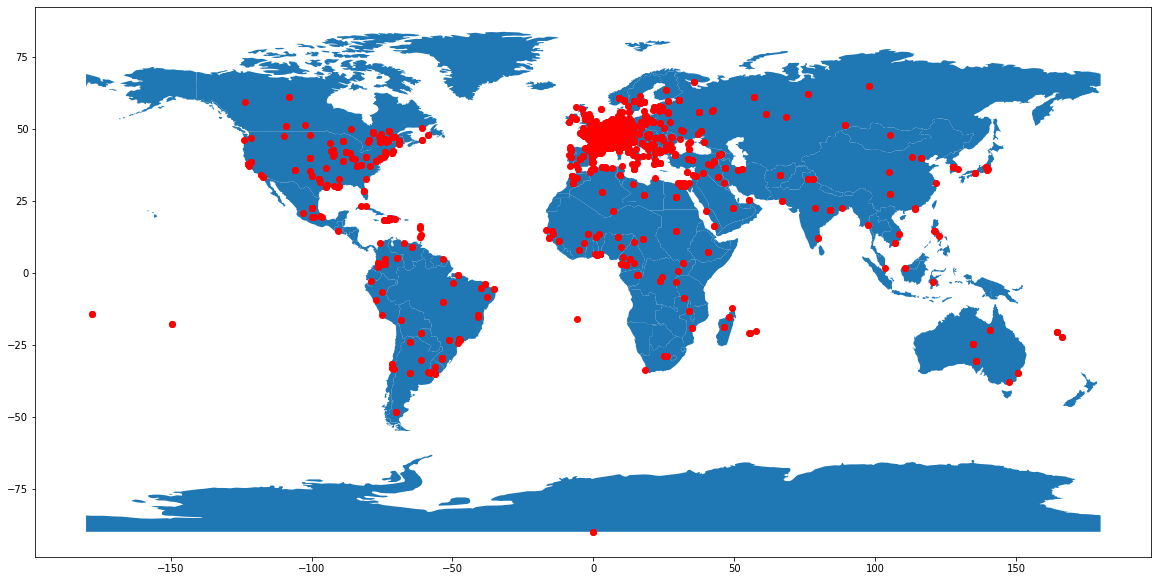

In [148]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[20,25])

shape_1914.plot(ax=ax)

geometry.plot(ax=ax, color="red")

In [188]:
shape_1914.set_index('NAME', inplace=True)

In [315]:
import numpy as np


def get_coords(geometry):
    vectors = []

    for p in geometry.itertuples():
        vectors.append({'x': p.geometry.x, 'y': p.geometry.y})

    return pd.DataFrame(vectors)

In [369]:
shape_1914.index

Index(['Luxembourg', 'Switzerland', 'Cyprus', 'Bhutan', 'Qatar',
       'United Arab Emirates', 'Cuba', 'United States', 'Haiti',
       'Dominican Republic',
       ...
       'Rhodesia', 'Japan', 'France', 'German Empire', 'Arabia (Nejd)',
       'Arabia (Nejd)', 'Arabia (Nejd)', 'Mongolia', 'Russia', 'Sakhalan'],
      dtype='object', name='NAME', length=125)

In [417]:
shape_1914.loc[['Italy', 'German Empire']]

,AREA,ABBREVNAME,FIPS_CODE,WB_CNTRY,geometry
NAME,,,,,
Italy,31.367,Italy,IT,ITA,"MULTIPOLYGON (((14.00365 45.58334, 13.87684 45..."
German Empire,68.837,Germany,None,None,"MULTIPOLYGON (((14.27361 53.93474, 14.37783 53..."


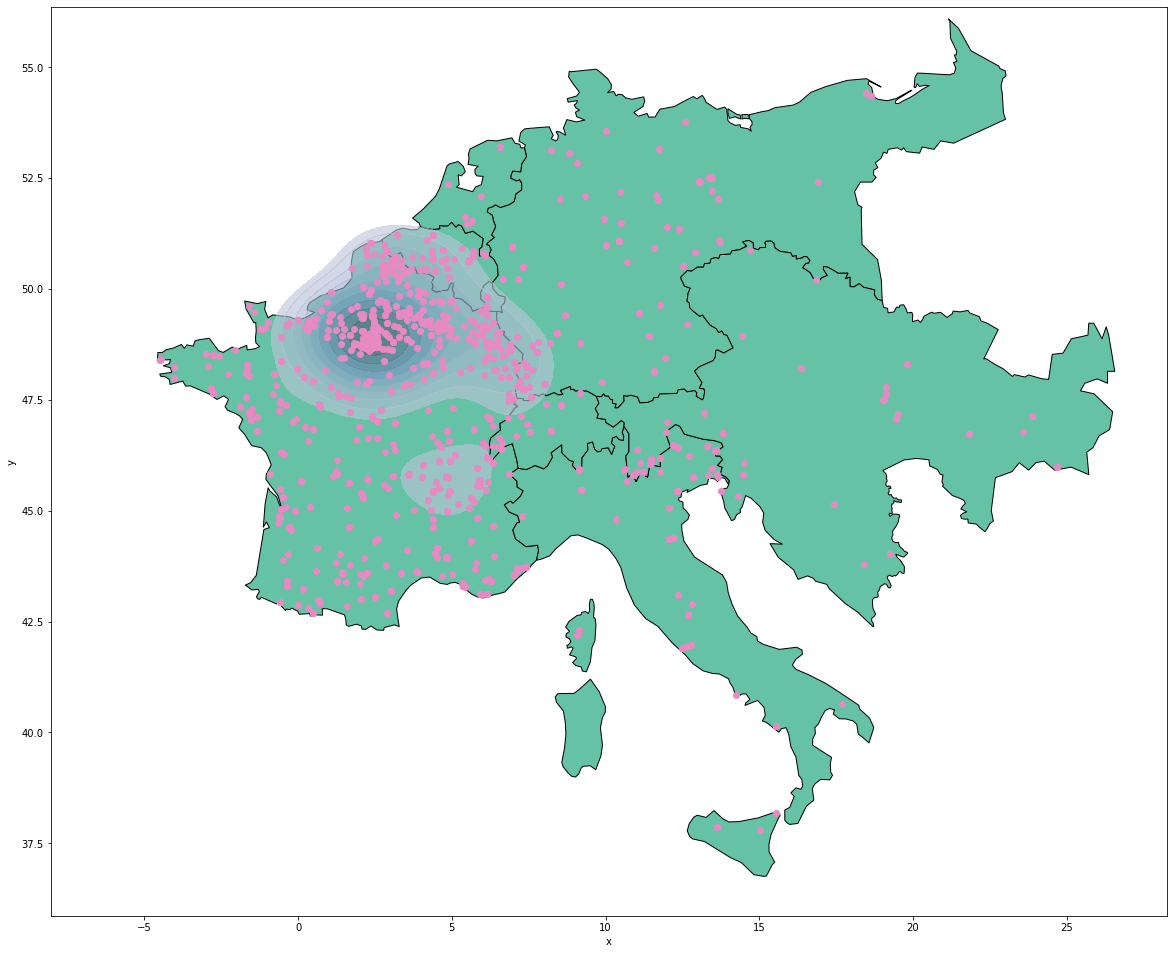

In [452]:
import seaborn as sns
import contextily as cx

from shapely.ops import cascaded_union

def plot_events(countries, levels=10, th=.3):
    colors = sns.color_palette('Set2')
    fig, ax = plt.subplots(figsize=[20,25])
    
    shape_1914.set_crs(epsg=4326, inplace=True)
    
    inpoly = geometry.within(cascaded_union(shape_1914.loc[countries].geometry))
    
    vectors = get_coords(geometry[inpoly])

    shape_1914.loc[countries].plot(ax=ax, color=colors[0], edgecolor='black')#, linewidth=3)
    # cx.add_basemap(ax=ax)

    # sns.histplot(data=vectors, x='x', y='y', ax=ax, fill=True, bins=7)
    sns.kdeplot(data=vectors, x='x', y='y', ax=ax, fill=True, levels=levels, thresh=th, color=colors[2], alpha=.6)

    geometry[inpoly].plot(ax=ax, color=colors[3], zorder=2)

plot_events(['France', 'Italy', 'German Empire', 'Switzerland', 'Austro-Hungarian Empire', 'Belgium', 'Luxembourg', 'Netherlands'], levels=10, th=.4)

### What did the Geocoder miss?

In [83]:
geometry[geometry.address.isna()].to_csv('loeuvre1915_failed.csv')

In [84]:
geometry[geometry.address.isna()]

,mention,geometry,address
0,la dtrection de Montyon denl,GEOMETRYCOLLECTION EMPTY,None
0,"DE CHEVALLIER , LEVÉE FAR ORORE",GEOMETRYCOLLECTION EMPTY,None
0,"W ' ashingion ,",GEOMETRYCOLLECTION EMPTY,None
0,',GEOMETRYCOLLECTION EMPTY,None
0,Francfort - sure,GEOMETRYCOLLECTION EMPTY,None
...,...,...,...
0,Gothembourg,GEOMETRYCOLLECTION EMPTY,None
0,ONT ETE PARTICULIERE - SALLEMANDS T,GEOMETRYCOLLECTION EMPTY,None
0,la Celle SaintCloud,GEOMETRYCOLLECTION EMPTY,None
0,Pantin ( commune ),GEOMETRYCOLLECTION EMPTY,None
